## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
#Load the fashion mnist dataset from keras
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [55]:
#Get the #of samples
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [56]:
#Dimensions of each image
print('Image shape:', x_train.shape[1:])

Image shape: (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
#Import keras for use across the functions
import keras
import matplotlib.pyplot as plt

In [0]:
#No of classes is 10
num_class = 10
#Lets use to_categorical() function to one hot encode the labels
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

In [59]:
#Sanity
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#Normalize by dividing each value by 255
x_train = x_train/255
x_test = x_test/255

In [61]:
#Sanity
x_test[0,1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#Conv2D in keras expects images to have the shape 28x28x1..so we will reshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [63]:
#Sanity
x_train.shape

(60000, 28, 28, 1)

In [64]:
#Sanity
x_train[0,1]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

### Import the necessary layers from keras to build the model

In [0]:
#Import the required keras modules
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import EarlyStopping

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
#Initialize the sequential model
model = Sequential()

#First Conv layer with 32 3x3 filters, relu activation
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),name="conv_1"))

#Second Conv layer with 32 3x3 filters, relu activation
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),name="conv_2"))

#Add the Flatten layer
model.add(Flatten(name="flat_1"))

#Add to the first Dense layer with 128 neurons and relu as activation function
model.add(Dense(128,activation="relu",name="dense_1"))

#Add second Dense layer with 10 neurons and softmax as activation function..this is the output layer
model.add(Dense(10,activation="softmax",name="dense_2"))

In [14]:
#Check the model summary to see if the model architecture is correct and check parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
flat_1 (Flatten)             (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#Lets define the early stopping with patience as 5
early_stopping = EarlyStopping(monitor="val_acc",patience=5)
callback_list = [early_stopping]

In [17]:
#Train the model with epochs as 10
BATCH_SIZE = 32
EPOCHS = 10

history = model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 28s 469us/step - loss: 0.3836 - acc: 0.8622 - val_loss: 0.3011 - val_acc: 0.8884
Epoch 2/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.2367 - acc: 0.9124 - val_loss: 0.2605 - val_acc: 0.9061
Epoch 3/10
60000/60000 [==============================] - 14s 235us/step - loss: 0.1724 - acc: 0.9359 - val_loss: 0.2545 - val_acc: 0.9108
Epoch 4/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.1240 - acc: 0.9535 - val_loss: 0.2812 - val_acc: 0.9093
Epoch 5/10
60000/60000 [==============================] - 14s 234us/step - loss: 0.0848 - acc: 0.9690 - val_loss: 0.2931 - val_acc: 0.9176
Epoch 6/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.0574 - acc: 0.9789 - val_loss: 0.3295 - val_acc: 0.9183
Epoch 7/10
600

In [18]:
#Get the accuracy from this model
model.evaluate(x_test,y_test)

#Accuracy is around 90

10000/10000 [==============================] - 1s 59us/step


[0.4928909079939127, 0.9094]

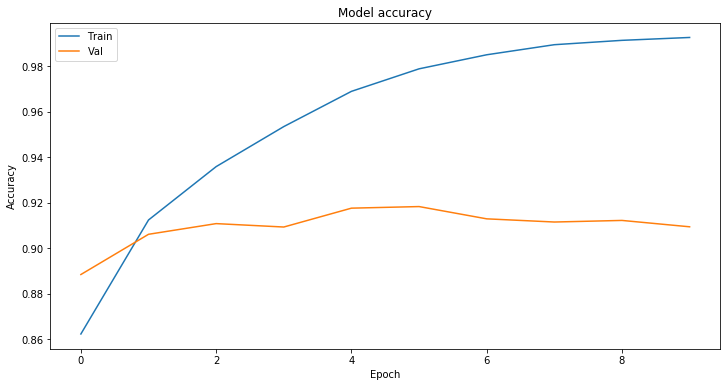

In [19]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',"Val"], loc='upper left')

#We can see that the train and val are too far apart indicating overfitting and lack of generalization

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [20]:
#Build the second model with maxpooling and dropouts
model2 = Sequential()

#First Conv layer with 32 3x3 filters, relu activation
model2.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),name="conv_1"))

#Second Conv layer with 32 3x3 filters, relu activation
model2.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),name="conv_2"))

#Add a max pooling layer with filter size of 2x2
model2.add(MaxPool2D(pool_size=(2,2)))

#Add a dropout layer with 25% random drops
model2.add(Dropout(rate=0.25))

#Add the Flatten layer
model2.add(Flatten(name="flat_1"))

#Add to the first Dense layer with 128 neurons and relu as activation function
model2.add(Dense(128,activation="relu",name="dense_1"))

#Add second Dense layer with 10 neurons and softmax as activation function..this is the output layer
model2.add(Dense(10,activation="softmax",name="dense_2"))



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
#Check model summary to check the model architecture
model2.summary()

#Overall parameters has reduced because of the maxpooling

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flat_1 (Flatten)             (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
model2.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [23]:
#Train the model with epochs as 10
BATCH_SIZE = 32
EPOCHS = 10

history2 = model2.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks=callback_list,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.3912 - acc: 0.8607 - val_loss: 0.3034 - val_acc: 0.8875
Epoch 2/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.2611 - acc: 0.9046 - val_loss: 0.2753 - val_acc: 0.8994
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.2145 - acc: 0.9201 - val_loss: 0.2246 - val_acc: 0.9202
Epoch 4/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.1795 - acc: 0.9332 - val_loss: 0.2246 - val_acc: 0.9201
Epoch 5/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.1494 - acc: 0.9439 - val_loss: 0.2437 - val_acc: 0.9170
Epoch 6/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.1296 - acc: 0.9509 - val_loss: 0.2324 - val_acc: 0.9208
Epoch 7/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.1063 - acc: 0.9601 - val_loss: 0.

In [24]:
#Get the accuracy from this model
model2.evaluate(x_test,y_test)

#Accuracy is around 92 which is higher than the previous model without dropouts

10000/10000 [==============================] - 1s 58us/step


[0.28315383731201293, 0.9238]

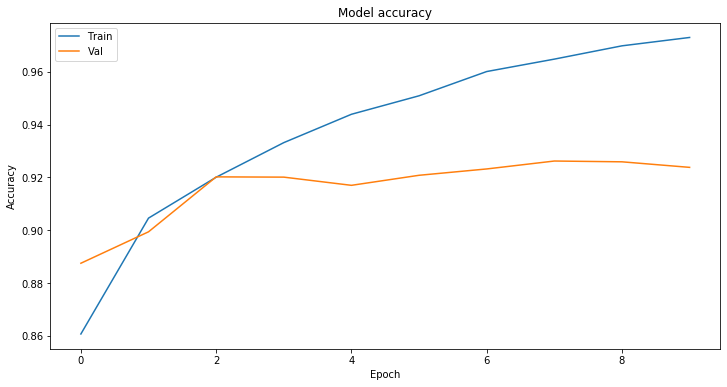

In [25]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',"Val"], loc='upper left')

#We can still see that the train and val are too far apart indicating overfitting and lack of generalization

In [27]:
#Lets run another 40 epochs to see if there any improvement in learning
history2 = model2.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=40,callbacks=callback_list,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 11s 181us/step - loss: 0.0561 - acc: 0.9795 - val_loss: 0.3004 - val_acc: 0.9262
Epoch 2/40
60000/60000 [==============================] - 11s 178us/step - loss: 0.0514 - acc: 0.9812 - val_loss: 0.3437 - val_acc: 0.9230
Epoch 3/40
60000/60000 [==============================] - 11s 178us/step - loss: 0.0468 - acc: 0.9827 - val_loss: 0.3268 - val_acc: 0.9268
Epoch 4/40
60000/60000 [==============================] - 11s 178us/step - loss: 0.0430 - acc: 0.9840 - val_loss: 0.3231 - val_acc: 0.9285
Epoch 5/40
60000/60000 [==============================] - 11s 179us/step - loss: 0.0418 - acc: 0.9853 - val_loss: 0.3468 - val_acc: 0.9232
Epoch 6/40
60000/60000 [==============================] - 11s 177us/step - loss: 0.0370 - acc: 0.9869 - val_loss: 0.4055 - val_acc: 0.9241
Epoch 7/40
60000/60000 [==============================] - 11s 177us/step - loss: 0.0358 - acc: 0.9874 - val_loss: 0.

In [28]:
#Get the accuracy from this model
model2.evaluate(x_test,y_test)

#Accuracy is still around 92 

10000/10000 [==============================] - 1s 60us/step


[0.40337141864947046, 0.9199]

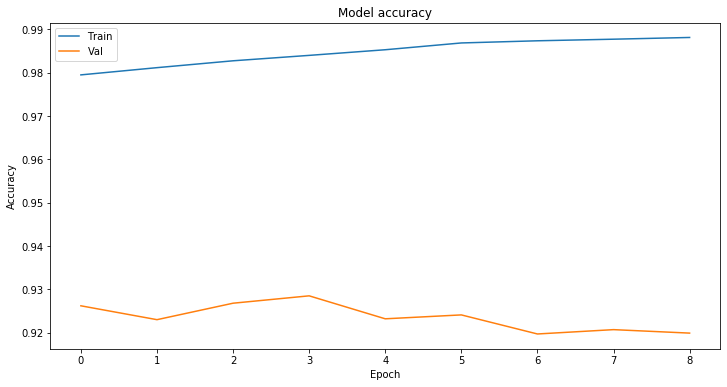

In [29]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',"Val"], loc='upper left')

#We can still see that the train and val are too far apart indicating overfitting and lack of generalization

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#Initialize the data generator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

#Fit the generator

datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

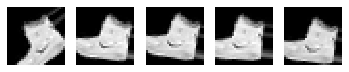

In [32]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [0]:
#Lets rebuild model for use with data generator
model3 = Sequential()

#First Conv layer with 32 3x3 filters, relu activation
model3.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),name="conv_1"))

#Second Conv layer with 32 3x3 filters, relu activation
model3.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1),name="conv_2"))

#Add a max pooling layer with filter size of 2x2
model3.add(MaxPool2D(pool_size=(2,2)))

#Add a dropout layer with 25% random drops
model3.add(Dropout(rate=0.25))

#Add the Flatten layer
model3.add(Flatten(name="flat_1"))

#Add to the first Dense layer with 128 neurons and relu as activation function
model3.add(Dense(128,activation="relu",name="dense_1"))

#Add second Dense layer with 10 neurons and softmax as activation function..this is the output layer
model3.add(Dense(10,activation="softmax",name="dense_2"))


In [34]:
#Check model summary to check the model architecture
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flat_1 (Flatten)             (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [0]:
#Compile the model with adam optimizer and categorical_cross entropy as the loss function and metrics as accuracy
model3.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
#Run the second model with fit generator to make use of data augmentation
history3  = model3.fit_generator(datagen.flow(x_train,y_train,batch_size=32),epochs=10,callbacks=callback_list,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.9621 - acc: 0.6448 - val_loss: 0.6604 - val_acc: 0.7622
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7168 - acc: 0.7319 - val_loss: 0.6237 - val_acc: 0.7658
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6498 - acc: 0.7574 - val_loss: 0.5412 - val_acc: 0.8019
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.6007 - acc: 0.7740 - val_loss: 0.5541 - val_acc: 0.7966
Epoch 5/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.5693 - acc: 0.7864 - val_loss: 0.5196 - val_acc: 0.8085
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5450 - acc: 0.7976 - val_loss: 0.4478 - val_acc: 0.8374
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5303 - acc: 0.8030 - val_loss: 0.4795 - val_acc: 0.8249
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [37]:
#Get the accuracy from this model
model3.evaluate(x_test,y_test)

#Accuracy is around 83 which is actually lower than the earlier ones..but probably better in terms of generalization
#More noise in the data introduced

10000/10000 [==============================] - 1s 64us/step


[0.44617847135066985, 0.8367]

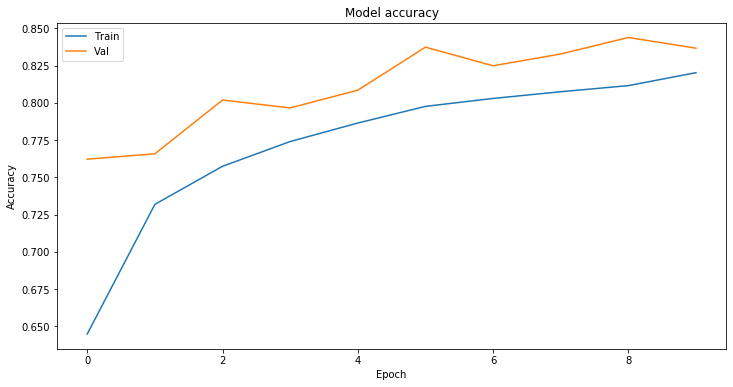

In [38]:
#Lets visualize the training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train',"Val"], loc='upper left')

#We can now see that the validation accuracy is more and is at least trying to approach training

In [65]:
#Lets run this for another 40 epochs and see if there is any improvement
history3  = model3.fit_generator(datagen.flow(x_train,y_train,batch_size=32),epochs=40,callbacks=callback_list,validation_data=(x_test,y_test))

Epoch 1/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.7154 - acc: 0.7442 - val_loss: 0.4731 - val_acc: 0.8326
Epoch 2/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6381 - acc: 0.7683 - val_loss: 0.5232 - val_acc: 0.8162
Epoch 3/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.6147 - acc: 0.7777 - val_loss: 0.5365 - val_acc: 0.8137
Epoch 4/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5994 - acc: 0.7837 - val_loss: 0.5089 - val_acc: 0.8229
Epoch 5/40
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5942 - acc: 0.7840 - val_loss: 0.5158 - val_acc: 0.8270
Epoch 6/40
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5750 - acc: 0.7922 - val_loss: 0.4790 - val_acc: 0.8290


In [66]:
#Get the accuracy from this model
model3.evaluate(x_test,y_test)

#Accuracy is still around 83

10000/10000 [==============================] - 1s 59us/step


[0.479029033946991, 0.829]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
#Import the image data generator again
from keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [40]:
#Lets load the CIFAR10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [41]:
#Check sample size and shape
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [42]:
print('Image shape:', x_train.shape[1:])

#This has color images

Image shape: (32, 32, 3)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
#Initialize the data generator
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False  # randomly flip images
)

#Image rotation with upto 50 degrees,

In [0]:
#Normalize
#Normalize by dividing each value by 255
x_train = x_train/255
x_test = x_test/255

### **Prepare/fit the generator.**

In [0]:
#Fit the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

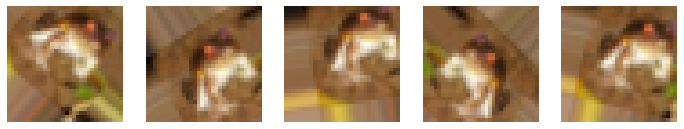

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,12))
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()